In [1]:
import matplotlib.pyplot as plt

In [260]:
import numpy as np

import xobjects as xo
import xtrack as xt
import xpart as xp

line = xt.Line(
    elements=[
    xt.Drift(length=1),
    xt.Multipole(order=1, knl=[0.1]),
    xt.Drift(length=1),
    xt.Multipole(order=3, knl=[0, 0, 0.3]),
    xt.Drift(length=1),
    xt.Multipole(knl=[0, 0.5]),
    xt.Drift(length=1),
    xt.Drift(length=3),
    ]
)

line.particle_ref = xp.Particles(p0c = 6500e9,
                                 q0 = 1,
                                 mass0 = xp.PROTON_MASS_EV)
context = xo.ContextCpu()
n_part = 1
particles = xp.Particles(
                         q0 = 1,
                         mass0 = xp.PROTON_MASS_EV,
                         x = [ -0.65, -0.55, -0.05, 0.05, 0.55, 0.65],
                         px = [0, 0, 0, 0, 0, 0],
                         ptau = [0.1, 0.1, 0.2, 0.2, 0.3, 0.4],
                         #p0c = [6500e9, 6500e9, 7500e12, 7500e12, 5500e5, 5500e5],
                         _context = context)

In [261]:
n_turns = 1
line.build_tracker(_context=context)
line.track(particles, num_turns=n_turns,
              turn_by_turn_monitor="ONE_TURN_EBE")


Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


In [262]:
# dipole = line.elements[1]
# sextupole = line.elements[3]
# quadrupole = line.elements[5]

In [280]:
from matplotlib.patches import Ellipse, Polygon

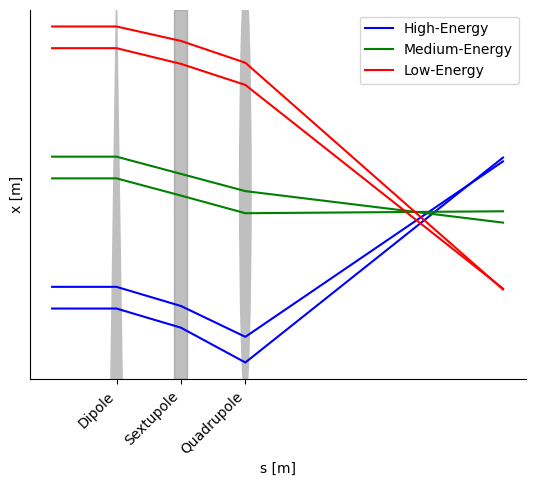

In [291]:
fig, ax = plt.subplots()


ax.plot(line.record_last_track.s[0].T, line.record_last_track.x[0].T, c='b', label='High-Energy')
ax.plot(line.record_last_track.s[1].T, line.record_last_track.x[1].T, c='b')

ax.plot(line.record_last_track.s[2].T, line.record_last_track.x[2].T, c='g', label='Medium-Energy')
ax.plot(line.record_last_track.s[3].T, line.record_last_track.x[3].T, c='g')

ax.plot(line.record_last_track.s[4].T, line.record_last_track.x[4].T, c='r', label='Low-Energy')
ax.plot(line.record_last_track.s[5].T, line.record_last_track.x[5].T, c='r')

dipole = Ellipse(xy = (3, -0.1), width=0.2, height=2, fc='grey', color=None, alpha=.5)
sextupole = Polygon([[0.9, -1], [1, 1], [1.1, -1]], fc='grey', color=None, alpha=.5)
ax.add_artist(dipole)
ax.add_artist(sextupole)

ax.axvspan(1.9, 2.1, alpha=0.5, color='grey')

ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['Dipole', 'Sextupole', 'Quadrupole'], rotation=45, ha='right')
ax.legend()
ax.set_yticks([])

ax.set_xlabel('s [m]')
ax.set_ylabel('x [m]')
ax.spines[['right', 'top']].set_visible(False)